# Assignment 15. Random Forest 
## Dataset :- Company_Data
### Quick info. about Random Forest.
#### Info. :- 
A random forest is a supervised machine learning algorithm that is constructed from decision tree algorithms. This algorithm is applied in various industries such as banking and e-commerce to predict behavior and outcomes.
A random forest is a machine learning technique that’s used to solve regression and classification problems. It utilizes ensemble learning, which is a technique that combines many classifiers to provide solutions to complex problems.
A random forest algorithm consists of many decision trees. The ‘forest’ generated by the random forest algorithm is trained through bagging or bootstrap aggregating. Bagging is an ensemble meta-algorithm that improves the accuracy of machine learning algorithms.
The (random forest) algorithm establishes the outcome based on the predictions of the decision trees. It predicts by taking the average or mean of the output from various trees. Increasing the number of trees increases the precision of the outcome.
#### Features of a Random Forest Algorithm
It’s more accurate than the decision tree algorithm.
It provides an effective way of handling missing data.
It can produce a reasonable prediction without hyper-parameter tuning.
It solves the issue of overfitting in decision trees.
In every random forest tree, a subset of features is selected randomly at the node’s splitting point.
#### Applications of random forest
Banking
Health care
Stock market
E-commerce
#### Advantages of random forest
It can perform both regression and classification tasks.
A random forest produces good predictions that can be understood easily.
It can handle large datasets efficiently.
The random forest algorithm provides a higher level of accuracy in predicting outcomes over the decision tree algorithm.
#### Disadvantages of random forest
When using a random forest, more resources are required for computation.
It consumes more time compared to a decision tree algorithm.
https://www.analyticsvidhya.com/blog/2021/06/understanding-random-forest/

In [1]:
# important libraries
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder


#### Data loading

In [2]:
Company_Data01 = pd.read_csv("D:\Data Science Material\Assignments\Random Forest\Company_Data.csv")

In [3]:
Company_Data01.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


#### Exploring more 

In [4]:
# some mathematical caculation
Company_Data01.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [5]:
# # lets explore about the data types, null cols, dataset length, rows and columns
Company_Data01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [6]:
Company_Data01.shape

(400, 11)

#### Data Analysis

In [7]:
# finding NA values null values

Company_Data01.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

No NA values present in dataset

In [8]:
# finding the value of each rows

Company_Data01.Sales.value_counts()

7.80    4
8.77    3
9.32    3
4.10    3
6.20    3
       ..
3.67    1
7.62    1
9.54    1
8.41    1
9.71    1
Name: Sales, Length: 336, dtype: int64

In [9]:
# finding the value of each rows

Company_Data01.ShelveLoc.value_counts()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

In [10]:
# finding the value of each rows

Company_Data01.Urban.value_counts()

Yes    282
No     118
Name: Urban, dtype: int64

In [11]:
# finding the value of each rows

Company_Data01.US.value_counts()

Yes    258
No     142
Name: US, dtype: int64

In [12]:
# finding the value of each rows

Company_Data01.Advertising.value_counts()

0     144
10     25
11     22
13     20
5      19
7      16
12     16
3      14
4      12
15     12
16     11
8      11
14     11
9      10
2       9
19      8
1       8
6       7
17      6
18      6
20      4
23      2
22      2
24      1
25      1
26      1
29      1
21      1
Name: Advertising, dtype: int64

In [13]:
# making original data safe

Company_Data = Company_Data01.copy()

#### Data Cleaning

In [14]:
Company_Data.head(1)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.5,138,73,11,276,120,Bad,42,17,Yes,Yes


In [15]:
Company_Data.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [32]:
Company_Data.Sales.mean()

7.496325

#### outlier 

In [33]:
# making data in to categotical form 

Company_Data.loc[Company_Data["Sales"]>=7.49,"Sale"]="Good"
Company_Data.loc[Company_Data["Sales"]<=7.49,"Sale"]="Risky"

In [36]:
Company_Data.drop('Sales',inplace = True,axis = 1)

In [38]:
Company_Data.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sale
0,138,73,11,276,120,Bad,42,17,Yes,Yes,Good
1,111,48,16,260,83,Good,65,10,Yes,Yes,Good
2,113,35,10,269,80,Medium,59,12,Yes,Yes,Good
3,117,100,4,466,97,Medium,55,14,Yes,Yes,Risky
4,141,64,3,340,128,Bad,38,13,Yes,No,Risky


In [40]:
def count_plot(df, columns):
    plt.figure(figsize=(10, 5))
    for i,var  in enumerate(columns):
        plt.subplot(1,2,1)
        g = sns.countplot(df[var])
    plt.tight_layout()
    
features = Company_Data.columns.tolist()
features.remove('Sale')
features

['CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US']

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Acer\anaconda3\lib\site-p

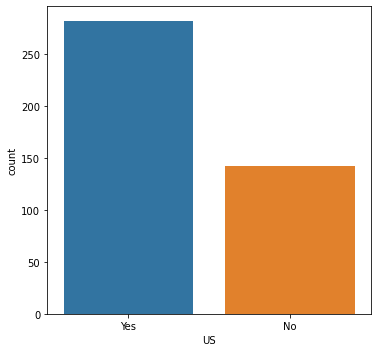

In [41]:
count_plot(Company_Data, features)
plt.show()

In [42]:
# OrdinalEncoder - The input to this transformer should be an array-like of integers or strings, 
# denoting the values taken on by categorical (discrete) features. 
# The features are converted to ordinal integers. 
# This results in a single column of integers (0 to n_categories - 1) per feature.

encoder = OrdinalEncoder()
data_encoded = encoder.fit_transform(Company_Data[features])
Company_Data_encoded = pd.DataFrame(data_encoded,columns = features)

data_encoded

array([[49., 51., 11., ...,  7.,  1.,  1.],
       [22., 27., 16., ...,  0.,  1.,  1.],
       [24., 14., 10., ...,  2.,  1.,  1.],
       ...,
       [71.,  5., 12., ...,  8.,  1.,  1.],
       [12., 57.,  7., ...,  2.,  1.,  1.],
       [45., 16.,  0., ...,  6.,  1.,  1.]])

In [43]:
Company_Data_encoded.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,49.0,51.0,11.0,141.0,54.0,0.0,17.0,7.0,1.0,1.0
1,22.0,27.0,16.0,129.0,18.0,1.0,40.0,0.0,1.0,1.0
2,24.0,14.0,10.0,138.0,15.0,2.0,34.0,2.0,1.0,1.0
3,28.0,77.0,4.0,249.0,31.0,2.0,30.0,4.0,1.0,1.0
4,52.0,42.0,3.0,178.0,62.0,0.0,13.0,3.0,1.0,0.0


In [44]:
#LebelEncoder - Encode target labels with value between 0 and n_classes-1. 
# This transformer should be used to encode target values, i.e. y, and not the input X.

encoder = LabelEncoder()
target_encoded = encoder.fit_transform(Company_Data['Sale'])
Company_Data_encoded['Sale'] = target_encoded
encoder.inverse_transform(target_encoded)

array(['Good', 'Good', 'Good', 'Risky', 'Risky', 'Good', 'Risky', 'Good',
       'Risky', 'Risky', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Risky', 'Risky',
       'Good', 'Good', 'Good', 'Risky', 'Risky', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Risky', 'Good', 'Good', 'Risky', 'Risky',
       'Risky', 'Risky', 'Good', 'Good', 'Risky', 'Risky', 'Risky',
       'Good', 'Risky', 'Risky', 'Good', 'Risky', 'Risky', 'Good',
       'Risky', 'Risky', 'Risky', 'Good', 'Risky', 'Risky', 'Risky',
       'Good', 'Risky', 'Risky', 'Good', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Risky', 'Risky', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Risky',
       'Risky', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Risky', 'Risky',
       'Risky', 'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Risky',
       'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'R

In [45]:
Company_Data_encoded.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sale
0,49.0,51.0,11.0,141.0,54.0,0.0,17.0,7.0,1.0,1.0,0
1,22.0,27.0,16.0,129.0,18.0,1.0,40.0,0.0,1.0,1.0,0
2,24.0,14.0,10.0,138.0,15.0,2.0,34.0,2.0,1.0,1.0,0
3,28.0,77.0,4.0,249.0,31.0,2.0,30.0,4.0,1.0,1.0,1
4,52.0,42.0,3.0,178.0,62.0,0.0,13.0,3.0,1.0,0.0,1


#### Applying feature selection

In [46]:
from sklearn.model_selection import train_test_split


In [47]:
Company_Data_encoded.head(1)

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sale
0,49.0,51.0,11.0,141.0,54.0,0.0,17.0,7.0,1.0,1.0,0


In [48]:
X = Company_Data_encoded.iloc[:,:-1]
y = Company_Data_encoded['Sale']

In [50]:
X.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,49.0,51.0,11.0,141.0,54.0,0.0,17.0,7.0,1.0,1.0
1,22.0,27.0,16.0,129.0,18.0,1.0,40.0,0.0,1.0,1.0
2,24.0,14.0,10.0,138.0,15.0,2.0,34.0,2.0,1.0,1.0
3,28.0,77.0,4.0,249.0,31.0,2.0,30.0,4.0,1.0,1.0
4,52.0,42.0,3.0,178.0,62.0,0.0,13.0,3.0,1.0,0.0


In [51]:
y.head()

0    0
1    0
2    0
3    1
4    1
Name: Sale, dtype: int32

In [52]:
# Separate out dataset into train test split

# using this train and test we prevent the over fitting part of dataseet
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=40)
# showing shape of data actual dividation happened or not ?
print("shape of x_train",X_train.shape)
print("shape of x_test",X_test.shape)
print("shape of y_train",y_train.shape)
print("shape of y_test",y_test.shape)

shape of x_train (320, 10)
shape of x_test (80, 10)
shape of y_train (320,)
shape of y_test (80,)


In [53]:
### Correlation on X_train

X_train.corr()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
CompPrice,1.000000,-0.084956,-0.028948,-0.109772,0.574617,0.062570,-0.087104,0.067924,0.038742,0.016328
Income,-0.084956,1.000000,0.031118,-0.024201,-0.059941,-0.083931,0.035417,-0.068314,0.043832,0.054358
Advertising,-0.028948,0.031118,1.000000,0.291403,0.033836,0.022569,0.009784,-0.055833,0.080288,0.681758
Population,-0.109772,-0.024201,0.291403,1.000000,-0.021804,-0.039198,-0.013783,-0.096197,-0.020283,0.090677
Price,0.574617,-0.059941,0.033836,-0.021804,1.000000,0.029146,-0.116226,0.115430,0.046004,0.070218
ShelveLoc,0.062570,-0.083931,0.022569,-0.039198,0.029146,1.000000,0.062742,0.013487,-0.049865,-0.046237
Age,-0.087104,0.035417,0.009784,-0.013783,-0.116226,0.062742,1.000000,-0.003956,0.031752,0.040856
Education,0.067924,-0.068314,-0.055833,-0.096197,0.115430,0.013487,-0.003956,1.000000,-0.027561,-0.113411
Urban,0.038742,0.043832,0.080288,-0.020283,0.046004,-0.049865,0.031752,-0.027561,1.000000,0.090387
US,0.016328,0.054358,0.681758,0.090677,0.070218,-0.046237,0.040856,-0.113411,0.090387,1.000000


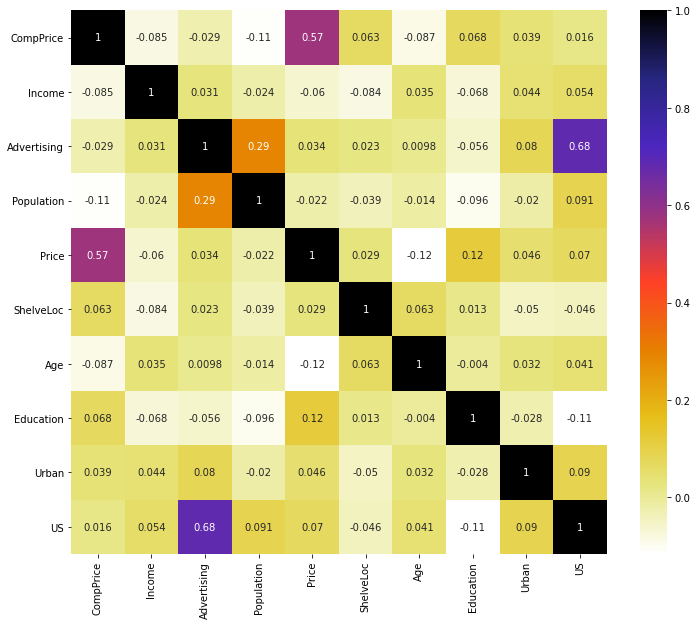

In [54]:
import seaborn as sns
# using pearson correlation,we doing correlation on training dataset only
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [55]:
# with the following feature we can select highly correlated feature 
# it wll remove the first feature that is correlated with anything other feature 

def correlation(dataset,threshold):
    col_corr = set()  # set of all the names of correlated cols 
    corr_metrix = dataset.corr()
    for i in range(len(corr_metrix.columns)):
        for j in range(i):
            if abs(corr_metrix.iloc[i,j]) > threshold: # we r interesting in absolute coeff.values
                colnames = corr_metrix.columns[i]  # getting the names of cols
                col_corr.add(colnames)
    return col_corr

In [56]:
corr_features = correlation(X_train,0.8)
len(set(corr_features))

0

Here we found Zero correlation in our dataset X_train

### Model building

#### Random forest

In [60]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier


num_forest = 100
max_features = 3
kfold = KFold(n_splits = 10, random_state = 40, shuffle = True)
model = RandomForestClassifier(n_estimators = num_forest, max_features = max_features)
result = cross_val_score(model, X, y, cv=kfold)

print(result.mean())

0.8024999999999999


### Accuracy :- 80.24 %

In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
# ensemble learning it takes learning from multiple model and combine it
num_forest = 100
max_features = 1
model = RandomForestClassifier(n_estimators = 100, max_features = 1)
kfold = KFold(n_splits = 20, random_state = 40, shuffle = True)
model.fit(X_train, y_train)
result = cross_val_score(model, X, y, cv=kfold)
print(result.mean())

0.785


### Accuracy :- 79.75 %